In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.stats import skew, kurtosis
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv(r'C:\Users\user\Desktop\ML\SUPERVISED_REGRESSION\CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df[df.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [5]:
for i in df.columns:
    print("Name of column : ",i)
    print("Unique values in the column \t",i ," :",df[i].unique())
    print("Length of unique values in the column ",i," is " ,len(df[i].unique()))
    print("\n")

Name of column :  car_ID
Unique values in the column 	 car_ID  : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]
Length of unique values in the column  car_ID  is  205


Name of column :  symboling
Unique values in 

In [6]:
df.drop(columns='car_ID',inplace=True)

In [7]:
for i in df.columns:
    print("Name of column : ",i)
    print("Unique values in the column \t",i ," :",df[i].unique())
    print("Length of unique values in the column ",i," is " ,len(df[i].unique()))
    print("\n")

Name of column :  symboling
Unique values in the column 	 symboling  : [ 3  1  2  0 -1 -2]
Length of unique values in the column  symboling  is  6


Name of column :  CarName
Unique values in the column 	 CarName  : ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'maz

In [8]:
df["price"].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_7456\2350207173.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"],color='g')


<Axes: xlabel='price', ylabel='Density'>

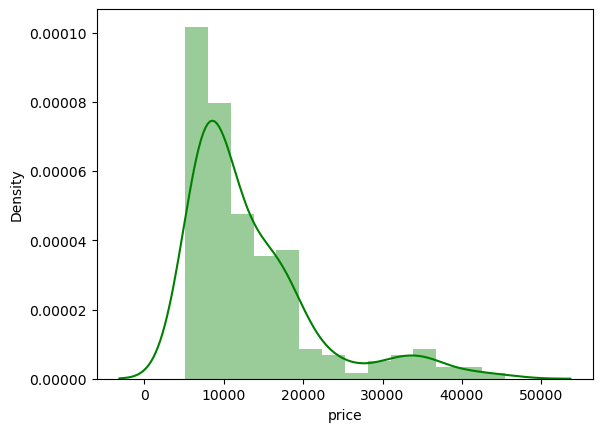

In [9]:
sns.distplot(df["price"],color='g')

C:\Users\user\AppData\Local\Temp\ipykernel_7456\2797271713.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(np.log(np.log(df["price"]))),color='b')


<Axes: xlabel='price', ylabel='Density'>

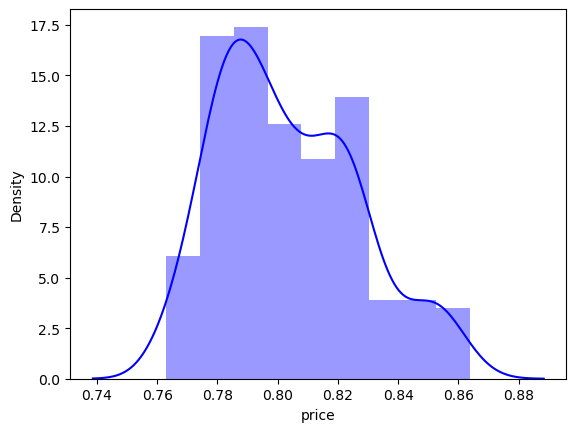

In [12]:
sns.distplot(np.log(np.log(np.log(df["price"]))),color='b')

<Axes: >

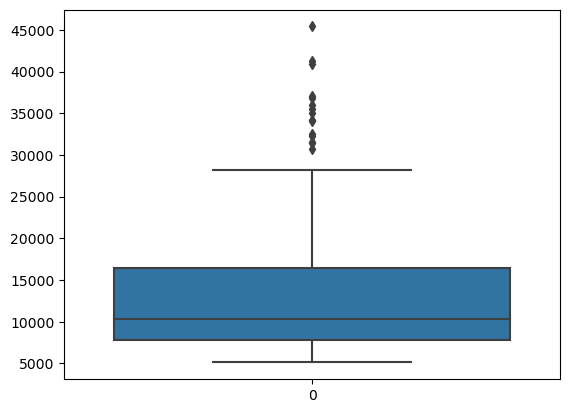

In [13]:
sns.boxplot(df["price"])

<Axes: >

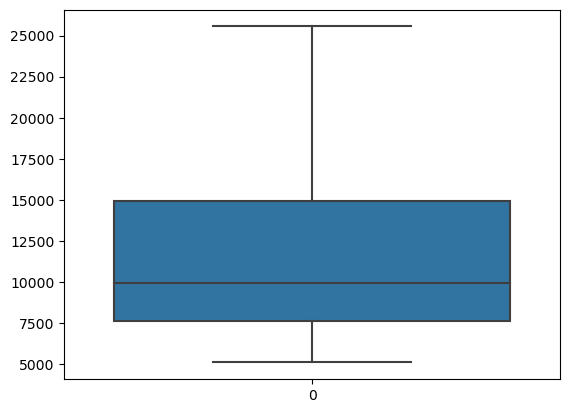

In [14]:
upper_limit = df['price'].quantile(0.921)
lower_limit = df['price'].quantile(0.01)
df_new = df[df['price'] <= upper_limit]
sns.boxplot(df_new['price'])

In [15]:
df_new

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [16]:
for i in df_new.columns:
    print("Name of column : ",i)
    print("Unique values in the column ",i ," :",df_new[i].unique())
    print("Length of unique values in the column ",i," is " ,len(df_new[i].unique()))
    print("\n")

Name of column :  symboling
Unique values in the column  symboling  : [ 3  1  2  0 -1 -2]
Length of unique values in the column  symboling  is  6


Name of column :  CarName
Unique values in the column  CarName  : ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4'
 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'maxda rx3' 'maxda glc deluxe' 'mazda rx2 coupe' 'mazda rx-4'
 'mazda glc deluxe' 'mazda 626' 'mazda glc' 'mazda rx-7 gs' '

In [17]:
df_new.drop(columns='enginelocation',inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_7456\3345552683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(columns='enginelocation',inplace=True)


In [18]:
df_new.price.describe()

count      188.000000
mean     11331.713654
std       4683.373818
min       5118.000000
25%       7669.000000
50%       9927.000000
75%      14911.750000
max      25552.000000
Name: price, dtype: float64

# Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in df_new[["CarName","fueltype","aspiration","doornumber","carbody","drivewheel","fuelsystem","enginetype","cylindernumber"]]:
    df_new[i] = label_encoder.fit_transform(df_new[i])
df_new

C:\Users\user\AppData\Local\Temp\ipykernel_7456\1740457714.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[i] = label_encoder.fit_transform(df_new[i])
C:\Users\user\AppData\Local\Temp\ipykernel_7456\1740457714.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[i] = label_encoder.fit_transform(df_new[i])
C:\Users\user\AppData\Local\Temp\ipykernel_7456\1740457714.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,1,0,2,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3,1,0,1,0,2,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,1,2,2,94.5,171.2,65.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,1,0,0,3,1,99.8,176.6,66.2,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,5,1,0,0,3,0,99.4,176.6,66.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,124,1,0,0,3,2,109.1,188.8,68.9,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,123,1,1,0,3,2,109.1,188.8,68.8,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,125,1,0,0,3,2,109.1,188.8,68.9,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,127,0,1,0,3,2,109.1,188.8,68.9,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [20]:
corr_columns=[]
for i in df_new.columns:
    corr2=df_new[[i,'price']].corr()
    print(i,corr2.iloc[0][1].round(1))
    if abs(corr2.iloc[0][1])>0.5:
         corr_columns.append(i)
print("Correlated columns : ",corr_columns)
df_corr=df_new[corr_columns]
df_corr

symboling -0.1
CarName -0.0
fueltype -0.1
aspiration 0.4
doornumber -0.2
carbody 0.1
drivewheel 0.5
wheelbase 0.7
carlength 0.7
carwidth 0.8
carheight 0.2
curbweight 0.8
enginetype -0.1
cylindernumber 0.1
enginesize 0.7
fuelsystem 0.6
boreratio 0.5
stroke 0.0
compressionratio 0.1
horsepower 0.7
peakrpm -0.1
citympg -0.7
highwaympg -0.7
price 1.0
Correlated columns :  ['drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'fuelsystem', 'horsepower', 'citympg', 'highwaympg', 'price']


,drivewheel,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,horsepower,citympg,highwaympg,price
0,2,88.6,168.8,64.1,2548,130,5,111,21,27,13495.0
1,2,88.6,168.8,64.1,2548,130,5,111,21,27,16500.0
2,2,94.5,171.2,65.5,2823,152,5,154,19,26,16500.0
3,1,99.8,176.6,66.2,2337,109,5,102,24,30,13950.0
4,0,99.4,176.6,66.4,2824,136,5,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...
200,2,109.1,188.8,68.9,2952,141,5,114,23,28,16845.0
201,2,109.1,188.8,68.8,3049,141,5,160,19,25,19045.0
202,2,109.1,188.8,68.9,3012,173,5,134,18,23,21485.0
203,2,109.1,188.8,68.9,3217,145,3,106,26,27,22470.0


# Scaling

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_corr)
scaled_data = scaler.transform(df_corr)
print(scaled_data.round(2))
df_corr[corr_columns]=scaled_data.round(2)
df_corr

[[1.   0.07 0.48 ... 0.15 0.21 0.41]
 [1.   0.07 0.48 ... 0.15 0.21 0.56]
 [1.   0.29 0.52 ... 0.09 0.18 0.56]
 ...
 [1.   0.82 0.83 ... 0.06 0.09 0.8 ]
 [1.   0.82 0.83 ... 0.3  0.21 0.85]
 [1.   0.82 0.83 ... 0.09 0.15 0.86]]


C:\Users\user\AppData\Local\Temp\ipykernel_7456\1951413460.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[corr_columns]=scaled_data.round(2)


,drivewheel,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,horsepower,citympg,highwaympg,price
0,1.0,0.07,0.48,0.34,0.52,0.57,0.71,0.41,0.15,0.21,0.41
1,1.0,0.07,0.48,0.34,0.52,0.57,0.71,0.41,0.15,0.21,0.56
2,1.0,0.29,0.52,0.47,0.66,0.75,0.71,0.70,0.09,0.18,0.56
3,0.5,0.48,0.61,0.53,0.42,0.39,0.71,0.36,0.24,0.29,0.43
4,0.0,0.46,0.61,0.55,0.66,0.61,0.71,0.44,0.06,0.06,0.60
...,...,...,...,...,...,...,...,...,...,...,...
200,1.0,0.82,0.83,0.77,0.72,0.66,0.71,0.43,0.21,0.24,0.57
201,1.0,0.82,0.83,0.77,0.77,0.66,0.71,0.74,0.09,0.15,0.68
202,1.0,0.82,0.83,0.77,0.75,0.92,0.71,0.57,0.06,0.09,0.80
203,1.0,0.82,0.83,0.77,0.85,0.69,0.43,0.38,0.30,0.21,0.85


# Linear Regression

Data

In [22]:
features = ['drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'fuelsystem', 'horsepower', 'citympg', 'highwaympg']
X = df_corr[features]
Y = df_corr['price']
x_train,x_test,y_train,y_test,=train_test_split(X,Y,train_size=0.80)

In [23]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [25]:
reg.score(x_test,y_test)

0.6405861090602643

In [26]:
mse=mean_squared_error(y_test,reg.predict(x_test))
mse

0.01602737052004698

In [27]:
np.sqrt(mse)

0.12659925165674155

Prediction

In [28]:
pr=reg.predict(x_test)
print(f"Prediction :\n{pr}")

Prediction :
[0.65501389 0.06930149 0.40327162 0.59130439 0.15471622 0.63724661
 0.45575834 0.207091   0.59405709 0.37519468 0.46527421 0.26171082
 0.32720116 0.07537796 0.72802078 0.41818028 0.10987077 0.07906137
 0.05780206 0.55874554 0.39486689 0.37227358 0.39056791 0.29517623
 0.25695697 0.09179255 0.64313249 0.32619317 0.11414353 0.06161797
 0.60459832 0.05218472 0.18796455 0.55446119 0.07587951 0.17188734
 0.05686412 0.40007561]


In [29]:
x_test

,drivewheel,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,horsepower,citympg,highwaympg
114,1.0,1.00,1.00,0.73,0.99,0.75,0.43,0.31,0.27,0.15
138,0.5,0.26,0.27,0.28,0.28,0.30,0.14,0.14,0.45,0.47
13,1.0,0.53,0.62,0.41,0.63,0.84,0.71,0.48,0.15,0.24
125,1.0,0.29,0.48,0.72,0.64,0.74,0.71,0.62,0.09,0.21
144,0.0,0.38,0.53,0.46,0.44,0.39,0.14,0.22,0.24,0.15
179,1.0,0.59,0.73,0.67,0.75,0.90,0.71,0.74,0.09,0.12
65,1.0,0.66,0.59,0.52,0.58,0.65,0.71,0.47,0.09,0.21
27,0.5,0.26,0.28,0.32,0.35,0.30,0.71,0.36,0.24,0.29
108,1.0,0.77,0.79,0.73,0.84,0.75,0.43,0.31,0.36,0.38
66,1.0,0.66,0.59,0.52,0.60,0.60,0.43,0.16,0.45,0.56


In [30]:
y_test

114    0.59
138    0.00
13     0.78
125    0.83
144    0.20
179    0.53
65     0.64
27     0.17
108    0.40
66     0.65
82     0.37
60     0.17
192    0.43
98     0.15
201    0.68
170    0.30
40     0.25
25     0.08
140    0.12
197    0.56
46     0.29
55     0.29
132    0.33
173    0.19
61     0.27
36     0.11
109    0.36
177    0.30
161    0.16
96     0.12
115    0.56
154    0.14
37     0.14
195    0.41
95     0.13
141    0.10
94     0.11
133    0.35
Name: price, dtype: float64

In [31]:
reg.coef_

array([ 0.11862498,  0.058481  , -0.0616535 ,  0.43064899,  0.47538477,
       -0.12215334,  0.04501255,  0.31162035, -0.01564998,  0.05331657])

In [32]:
reg.intercept_

-0.27355796100758956

In [34]:
linear=reg.intercept_
for i in range(0,10):
    linear+=reg.coef_[i]*x_test.iloc[37][i]
linear

0.400075607080327

In [35]:
print("Independent values X :\n",x_test.iloc[37])
print("Dependent value Y :",y_test.iloc[37])
print(" Predicted value by the model :",reg.predict([x_test.iloc[37]]))

Independent values X :
 drivewheel    0.50
wheelbase     0.45
carlength     0.79
carwidth      0.56
curbweight    0.60
enginesize    0.49
fuelsystem    0.71
horsepower    0.41
citympg       0.15
highwaympg    0.24
Name: 133, dtype: float64
Dependent value Y : 0.35
 Predicted value by the model : [0.40007561]


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Random Forest

In [36]:
from sklearn.svm import SVR 

SVModel = SVR() 
SVModel.fit(x_train, y_train) 
y_pred = SVModel.predict(x_test) 
print("Score :",SVModel.score(x_test,y_test))
print("The r2_score of our model is {}%".format(round(r2_score(y_test, y_pred), 2) *100))
print("The Mean Absolute Error of our Model is {}".format(round(mean_absolute_error(y_test, y_pred), 2)))
print("The root mean squared Error of our Model is {}".format(round( np.sqrt(mean_absolute_error(y_test, y_pred)), 2)))

Score : 0.6790656902449308
The r2_score of our model is 68.0%
The Mean Absolute Error of our Model is 0.09
The root mean squared Error of our Model is 0.3


# KNN

In [39]:
from sklearn.neighbors import KNeighborsRegressor

KNNModel = KNeighborsRegressor(n_neighbors=3)
KNNModel.fit(x_train,y_train)
y_pr = KNNModel.predict(x_test)
print("Score :",KNNModel.score(x_test,y_test))
print("The r2_score of our model is {}%".format(round(r2_score(y_test, y_pr), 2) *100))
print("The Mean Absolute Error of our Model is {}".format(round(mean_absolute_error(y_test, y_pr), 2)))
print("The root mean squared Error of our Model is {}".format(round( np.sqrt(mean_absolute_error(y_test, y_pr)), 2)))

Score : 0.6807846198550693
The r2_score of our model is 68.0%
The Mean Absolute Error of our Model is 0.09
The root mean squared Error of our Model is 0.3


#Decision Tree

In [40]:
from sklearn.tree import DecisionTreeRegressor  

DTModel = DecisionTreeRegressor(random_state = 0)  
DTModel.fit(x_train, y_train) 

y_pred = DTModel.predict(x_test) 

DTModel.score(x_test,y_test)

print("Score :",DTModel.score(x_test,y_test))
print("The r2_score of our model is {}%".format(round(r2_score(y_test, y_pred), 2) *100))
print("The Mean Absolute Error of our Model is {}".format(round(mean_absolute_error(y_test, y_pred), 2)))
print("The root mean squared Error of our Model is {}".format(round( np.sqrt(mean_absolute_error(y_test, y_pred)), 2)))

Score : 0.6363755660605912
The r2_score of our model is 64.0%
The Mean Absolute Error of our Model is 0.09
The root mean squared Error of our Model is 0.3


SVM

In [41]:
from sklearn.svm import SVR 

SVModel = SVR() 
SVModel.fit(x_train, y_train) 
  

y_pred = SVModel.predict(x_test) 



print("Score :",SVModel.score(x_test,y_test))
print("The r2_score of our model is {}%".format(round(r2_score(y_test, y_pred), 2) *100))
print("The Mean Absolute Error of our Model is {}".format(round(mean_absolute_error(y_test, y_pred), 2)))
print("The root mean squared Error of our Model is {}".format(round( np.sqrt(mean_absolute_error(y_test, y_pred)), 2)))

Score : 0.6790656902449308
The r2_score of our model is 68.0%
The Mean Absolute Error of our Model is 0.09
The root mean squared Error of our Model is 0.3


# Dimension Reductionality

# PCA

In [42]:
df_new

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,1,0,2,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3,1,0,1,0,2,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,1,2,2,94.5,171.2,65.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,1,0,0,3,1,99.8,176.6,66.2,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,5,1,0,0,3,0,99.4,176.6,66.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,124,1,0,0,3,2,109.1,188.8,68.9,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,123,1,1,0,3,2,109.1,188.8,68.8,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,125,1,0,0,3,2,109.1,188.8,68.9,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,127,0,1,0,3,2,109.1,188.8,68.9,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [43]:
col=df_new.columns

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_new)
scaled_data = scaler.transform(df_new)
df_new[col]=scaled_data.round(2)
df_new

C:\Users\user\AppData\Local\Temp\ipykernel_7456\49827781.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[col]=scaled_data.round(2)


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.0,0.02,1.0,0.0,1.0,0.00,1.0,0.07,0.48,0.34,...,0.57,0.71,0.66,0.33,0.12,0.41,0.35,0.15,0.21,0.41
1,1.0,0.02,1.0,0.0,1.0,0.00,1.0,0.07,0.48,0.34,...,0.57,0.71,0.66,0.33,0.12,0.41,0.35,0.15,0.21,0.56
2,0.6,0.01,1.0,0.0,1.0,0.50,1.0,0.29,0.52,0.47,...,0.75,0.71,0.10,0.77,0.12,0.70,0.35,0.09,0.18,0.56
3,0.8,0.03,1.0,0.0,0.0,0.75,0.5,0.48,0.61,0.53,...,0.39,0.71,0.46,0.73,0.19,0.36,0.55,0.24,0.29,0.43
4,0.8,0.04,1.0,0.0,0.0,0.75,0.0,0.46,0.61,0.55,...,0.61,0.71,0.46,0.73,0.06,0.44,0.55,0.06,0.06,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,0.95,1.0,0.0,0.0,0.75,1.0,0.82,0.83,0.77,...,0.66,0.71,0.89,0.59,0.16,0.43,0.51,0.21,0.24,0.57
201,0.2,0.94,1.0,1.0,0.0,0.75,1.0,0.82,0.83,0.77,...,0.66,0.71,0.89,0.59,0.11,0.74,0.47,0.09,0.15,0.68
202,0.2,0.95,1.0,0.0,0.0,0.75,1.0,0.82,0.83,0.77,...,0.92,0.71,0.74,0.44,0.11,0.57,0.55,0.06,0.09,0.80
203,0.2,0.97,0.0,1.0,0.0,0.75,1.0,0.82,0.83,0.77,...,0.69,0.43,0.34,0.73,1.00,0.38,0.27,0.30,0.21,0.85


In [44]:
dn1=df_new.price
df_new.drop(columns='price',inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_7456\1770334397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(columns='price',inplace=True)


In [46]:
for i in np.arange(0.50, 1, 0.05):
   
    pca = PCA(i)
    X_pca = pca.fit_transform(df_new)
    #print(X_pca)
    X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=30)
    reg=LinearRegression()
    reg.fit(X_train_pca,y_train)
    pred=reg.predict(X_test_pca)
    print("Variance : {}% Shape : {} Score : {}".format(round(i*100,1),X_pca.shape,round(reg.score(X_test_pca,y_test)*100,2)))

Variance : 50.0% Shape : (188, 2) Score : 68.79
Variance : 55.0% Shape : (188, 3) Score : 69.17
Variance : 60.0% Shape : (188, 3) Score : 69.17
Variance : 65.0% Shape : (188, 4) Score : 71.02
Variance : 70.0% Shape : (188, 4) Score : 71.02
Variance : 75.0% Shape : (188, 5) Score : 62.98
Variance : 80.0% Shape : (188, 6) Score : 62.34
Variance : 85.0% Shape : (188, 8) Score : 60.65
Variance : 90.0% Shape : (188, 9) Score : 59.95
Variance : 95.0% Shape : (188, 12) Score : 61.62


In [47]:
for i in np.arange(1,24):
   
    pca = PCA(i)
    X_pca = pca.fit_transform(df_new)
    #print(X_pca)
    X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=30)
    reg=LinearRegression()
    reg.fit(X_train_pca,y_train)
    pred=reg.predict(X_test_pca)
    print("n_components : {} Shape : {} Score : {}".format(i,X_pca.shape,round(reg.score(X_test_pca,y_test)*100,2)))

n_components : 1 Shape : (188, 1) Score : 12.3
n_components : 2 Shape : (188, 2) Score : 68.79
n_components : 3 Shape : (188, 3) Score : 69.17
n_components : 4 Shape : (188, 4) Score : 71.02
n_components : 5 Shape : (188, 5) Score : 62.98
n_components : 6 Shape : (188, 6) Score : 62.34
n_components : 7 Shape : (188, 7) Score : 61.27
n_components : 8 Shape : (188, 8) Score : 60.65
n_components : 9 Shape : (188, 9) Score : 59.95
n_components : 10 Shape : (188, 10) Score : 62.36
n_components : 11 Shape : (188, 11) Score : 62.15
n_components : 12 Shape : (188, 12) Score : 61.62
n_components : 13 Shape : (188, 13) Score : 58.12
n_components : 14 Shape : (188, 14) Score : 54.92
n_components : 15 Shape : (188, 15) Score : 54.21
n_components : 16 Shape : (188, 16) Score : 50.02
n_components : 17 Shape : (188, 17) Score : 49.72
n_components : 18 Shape : (188, 18) Score : 49.86
n_components : 19 Shape : (188, 19) Score : 48.3
n_components : 20 Shape : (188, 20) Score : 44.71
n_components : 21 Sh

From the above analysis,it is derived that the shape4 has the highest score in the testing